# Music Genre Classification

In [1]:
# This was needed for Librosa to work
#!pip uninstall numpy -y -v
#!pip uninstall numba -y -v
#!python3 -m pip install numba -v

In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Load dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa - audio handling library
import librosa
import librosa.display

import os
from collections import defaultdict

In [4]:
# load raw audio files
genres_path = "Data/genres_original"

def load_audio_file(filename):
    return librosa.load(filename)

def load_label_with_audio_files():
    label_audio_dir = defaultdict(list)
    correct_loaded_files = 0
    for _dir in os.listdir(genres_path):
        genre = _dir
        genre_path = f"{genres_path}/{genre}"
        print(f"getting files from genre:{genre}")
        for filename in os.listdir(genre_path):
            try:
                print(f"getting audio from file: {filename}")
                audio_file = load_audio_file(f"{genre_path}/{filename}")
                label_audio_dir[genre].append(audio_file)
                correct_loaded_files += 1
            except Exception:
                print(f"Failed to load file: {filename}")
                continue
    return label_audio_dir, correct_loaded_files

files, num = load_label_with_audio_files()
print(f"Loaded {num}/1000")

getting files from genre:pop
getting audio from file: pop.00027.wav
getting audio from file: pop.00033.wav
getting audio from file: pop.00032.wav
getting audio from file: pop.00026.wav
getting audio from file: pop.00030.wav
getting audio from file: pop.00024.wav
getting audio from file: pop.00018.wav
getting audio from file: pop.00019.wav
getting audio from file: pop.00025.wav
getting audio from file: pop.00031.wav
getting audio from file: pop.00009.wav
getting audio from file: pop.00035.wav
getting audio from file: pop.00021.wav
getting audio from file: pop.00020.wav
getting audio from file: pop.00034.wav
getting audio from file: pop.00008.wav
getting audio from file: pop.00022.wav
getting audio from file: pop.00036.wav
getting audio from file: pop.00037.wav
getting audio from file: pop.00023.wav
getting audio from file: pop.00044.wav
getting audio from file: pop.00050.wav
getting audio from file: pop.00078.wav
getting audio from file: pop.00087.wav
getting audio from file: pop.00093.

getting audio from file: disco.00057.wav
getting audio from file: disco.00043.wav
getting audio from file: disco.00094.wav
getting audio from file: disco.00080.wav
getting audio from file: disco.00081.wav
getting audio from file: disco.00095.wav
getting audio from file: disco.00042.wav
getting audio from file: disco.00056.wav
getting audio from file: disco.00031.wav
getting audio from file: disco.00025.wav
getting audio from file: disco.00019.wav
getting audio from file: disco.00018.wav
getting audio from file: disco.00024.wav
getting audio from file: disco.00030.wav
getting audio from file: disco.00026.wav
getting audio from file: disco.00032.wav
getting audio from file: disco.00033.wav
getting audio from file: disco.00027.wav
getting audio from file: disco.00023.wav
getting audio from file: disco.00037.wav
getting audio from file: disco.00036.wav
getting audio from file: disco.00022.wav
getting audio from file: disco.00008.wav
getting audio from file: disco.00034.wav
getting audio fr

getting audio from file: reggae.00027.wav
getting audio from file: reggae.00033.wav
getting audio from file: reggae.00019.wav
getting audio from file: reggae.00025.wav
getting audio from file: reggae.00031.wav
getting audio from file: reggae.00030.wav
getting audio from file: reggae.00024.wav
getting audio from file: reggae.00018.wav
getting audio from file: reggae.00001.wav
getting audio from file: reggae.00015.wav
getting audio from file: reggae.00029.wav
getting audio from file: reggae.00028.wav
getting audio from file: reggae.00014.wav
getting audio from file: reggae.00000.wav
getting audio from file: reggae.00016.wav
getting audio from file: reggae.00002.wav
getting audio from file: reggae.00003.wav
getting audio from file: reggae.00017.wav
getting audio from file: reggae.00013.wav
getting audio from file: reggae.00007.wav
getting audio from file: reggae.00006.wav
getting audio from file: reggae.00012.wav
getting audio from file: reggae.00038.wav
getting audio from file: reggae.00

getting audio from file: rock.00096.wav
getting audio from file: rock.00069.wav
getting audio from file: rock.00041.wav
getting audio from file: rock.00055.wav
getting audio from file: rock.00054.wav
getting audio from file: rock.00040.wav
getting audio from file: rock.00068.wav
getting audio from file: rock.00097.wav
getting audio from file: rock.00083.wav
getting audio from file: rock.00095.wav
getting audio from file: rock.00081.wav
getting audio from file: rock.00056.wav
getting audio from file: rock.00042.wav
getting audio from file: rock.00043.wav
getting audio from file: rock.00057.wav
getting audio from file: rock.00080.wav
getting audio from file: rock.00094.wav
getting audio from file: rock.00030.wav
getting audio from file: rock.00024.wav
getting audio from file: rock.00018.wav
getting audio from file: rock.00019.wav
getting audio from file: rock.00025.wav
getting audio from file: rock.00031.wav
getting audio from file: rock.00027.wav
getting audio from file: rock.00033.wav


getting audio from file: country.00056.wav
getting audio from file: country.00057.wav
getting audio from file: country.00043.wav
getting audio from file: country.00094.wav
getting audio from file: country.00080.wav
getting audio from file: country.00096.wav
getting audio from file: country.00082.wav
getting audio from file: country.00069.wav
getting audio from file: country.00055.wav
getting audio from file: country.00041.wav
getting audio from file: country.00040.wav
getting audio from file: country.00054.wav
getting audio from file: country.00068.wav
getting audio from file: country.00083.wav
getting audio from file: country.00097.wav
getting audio from file: country.00093.wav
getting audio from file: country.00087.wav
getting audio from file: country.00050.wav
getting audio from file: country.00044.wav
getting audio from file: country.00078.wav
getting audio from file: country.00079.wav
getting audio from file: country.00045.wav
getting audio from file: country.00051.wav
getting aud

/var/folders/s7/d2gc2l317p15g3y_6zbwmhz80000gp/T/ipykernel_42782/1843885984.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  return librosa.load(filename)
/usr/local/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Failed to load file: jazz.00054.wav
getting audio from file: jazz.00040.wav
getting audio from file: jazz.00068.wav
getting audio from file: jazz.00097.wav
getting audio from file: jazz.00083.wav
getting audio from file: jazz.00082.wav
getting audio from file: jazz.00096.wav
getting audio from file: jazz.00069.wav
getting audio from file: jazz.00041.wav
getting audio from file: jazz.00055.wav
getting audio from file: jazz.00043.wav
getting audio from file: jazz.00057.wav
getting audio from file: jazz.00080.wav
getting audio from file: jazz.00094.wav
getting audio from file: jazz.00095.wav
getting audio from file: jazz.00081.wav
getting audio from file: jazz.00056.wav
getting audio from file: jazz.00042.wav
getting audio from file: jazz.00046.wav
getting audio from file: jazz.00052.wav
getting audio from file: jazz.00085.wav
getting audio from file: jazz.00091.wav
getting audio from file: jazz.00090.wav
getting audio from file: jazz.00084.wav
getting audio from file: jazz.00053.wav
gett

## Soundwaves

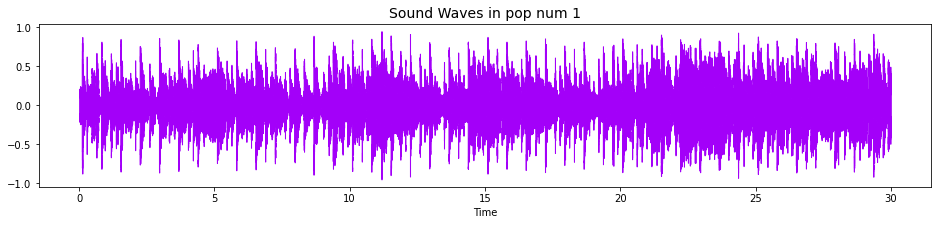

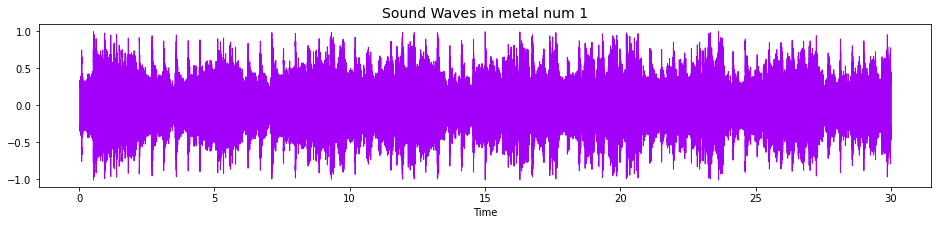

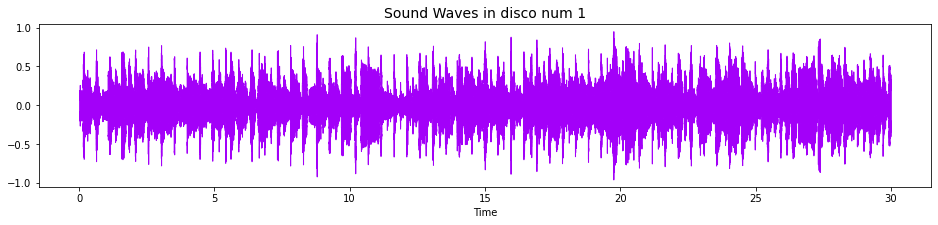

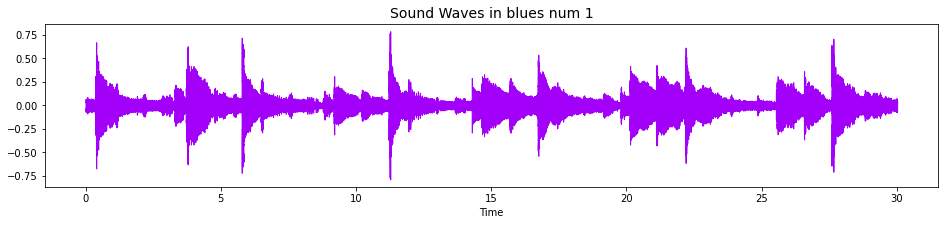

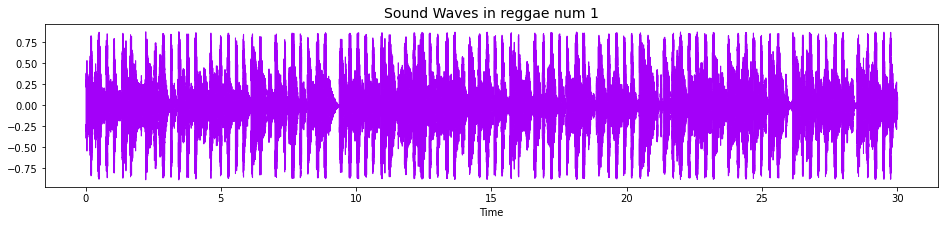

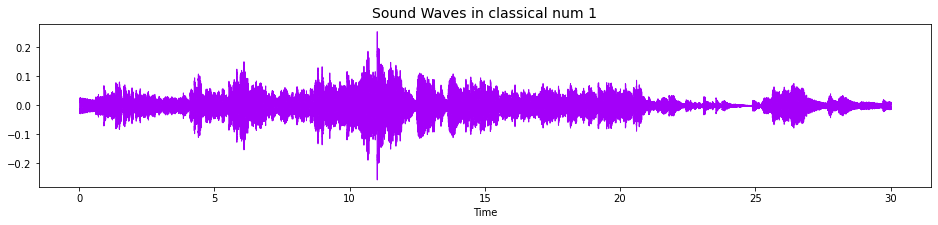

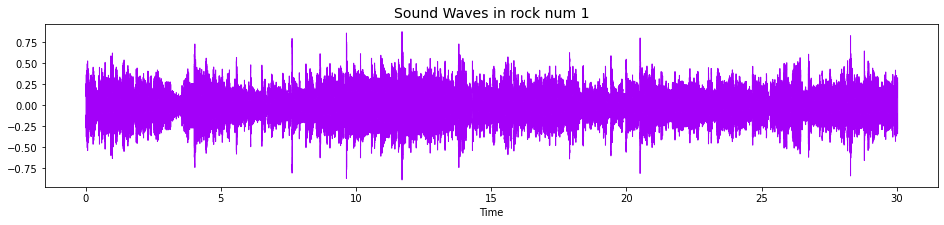

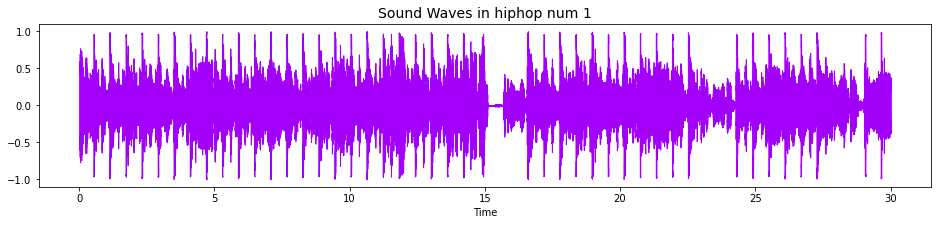

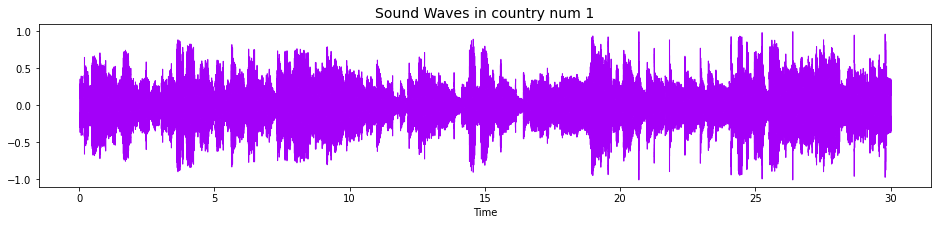

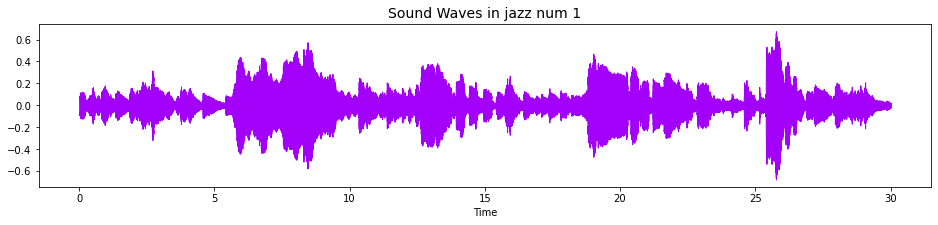

In [5]:
def plot_soundwave(sound, sample_rate, title):
    plt.figure(figsize = (16, 3))
    librosa.display.waveshow(y = sound, sr = sample_rate, color = "#A300F9");
    plt.title(f"Sound Waves in {title}", fontsize = 14);
    
def plot_n_for_genre(genre, n):
    audiofiles = files[genre]
    for i, audiofile in enumerate(audiofiles):
        sound, sample_rate = audiofile
        plot_soundwave(sound, sample_rate, f"{genre} num {i + 1}")
        if i+1 == n:
            break     

for genre in files:
    plot_n_for_genre(genre, 1)

## Spectrogram

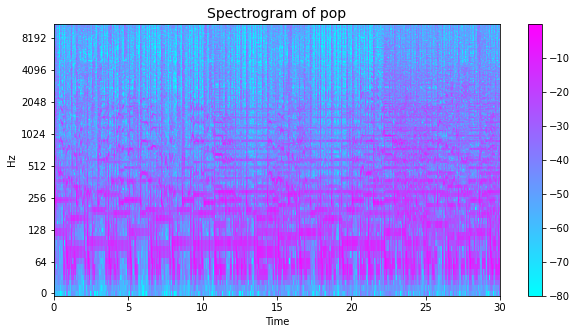

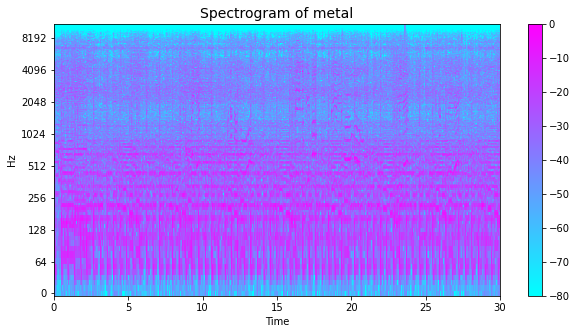

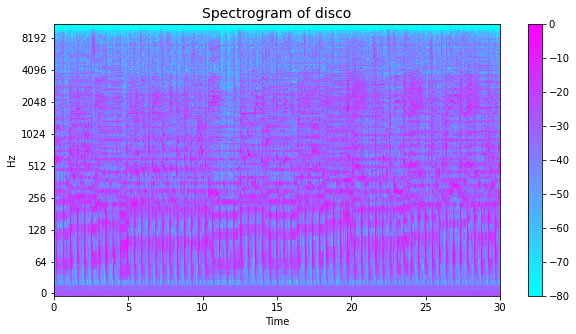

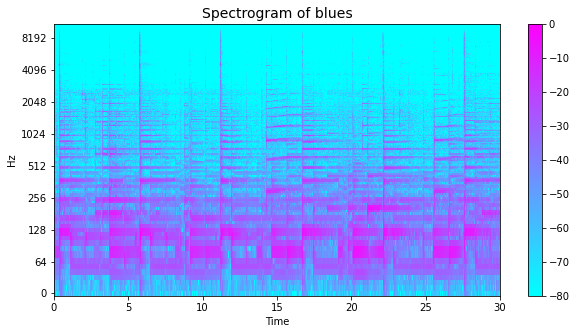

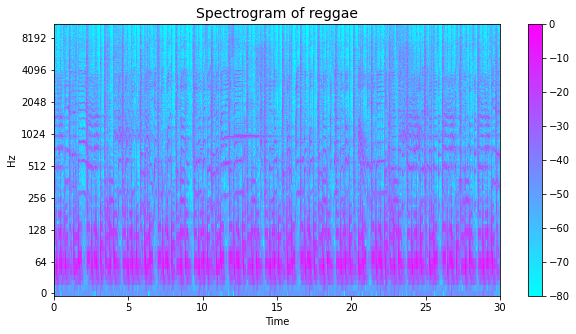

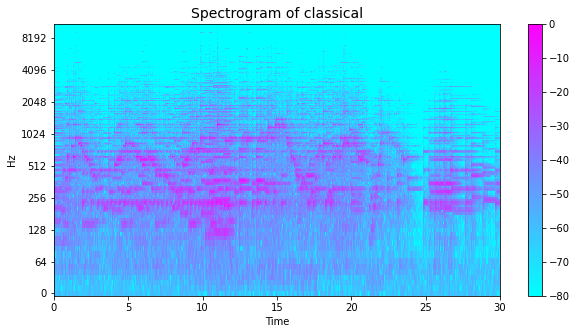

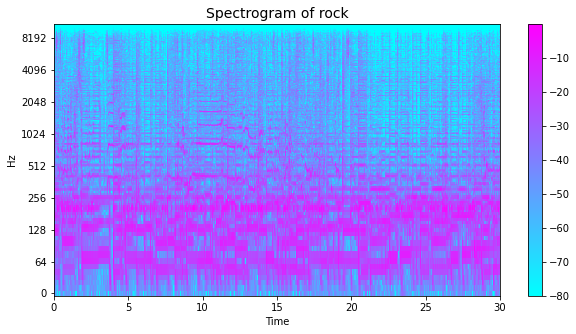

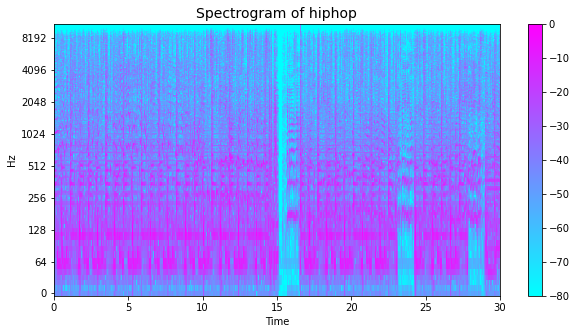

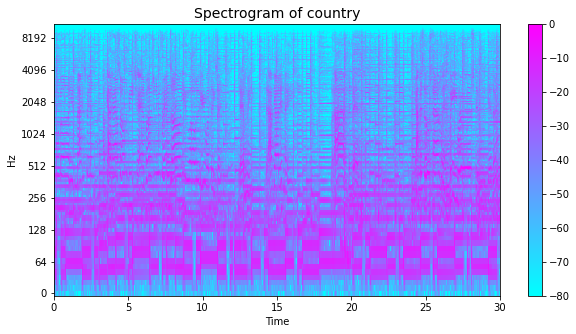

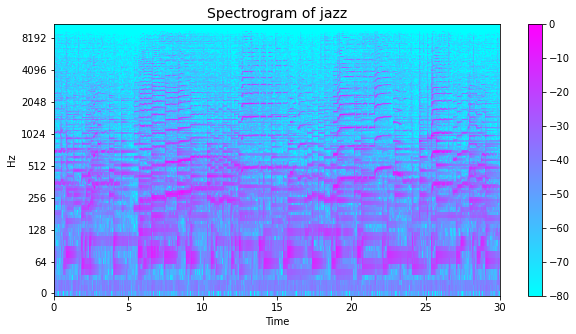

In [6]:
# Fourier Transformation
# Default FFT window size
def ftt(sound):
    _ftt = np.abs(librosa.stft(sound, n_fft = 2048, hop_length = 512))
    return _ftt

def spectogram(audiofile, title):
    sound, sr = audiofile
    _ftt = ftt(sound)
    DB = librosa.amplitude_to_db(_ftt, ref = np.max)
    plt.figure(figsize = (10, 5))
    librosa.display.specshow(DB, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'log',
                            cmap = 'cool')
    plt.colorbar()
    plt.title(f"Spectrogram of {title}", fontsize = 14);
    
def plot_n_spect_for_genre(genre, n):
    audiofiles = files[genre]
    for i, audiofile in enumerate(audiofiles):
        spectogram(audiofile, f"{genre}")
        if i+1 == n:
            break
    
    
for genre in files:
    plot_n_spect_for_genre(genre, 1)

## Mel Spectrogram

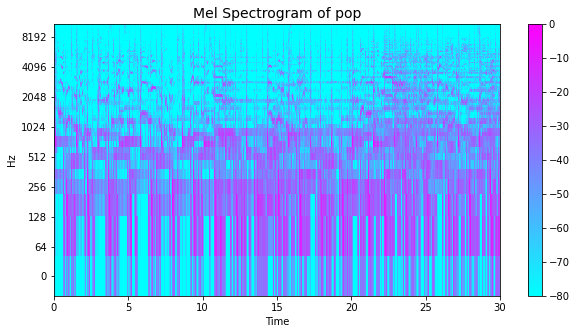

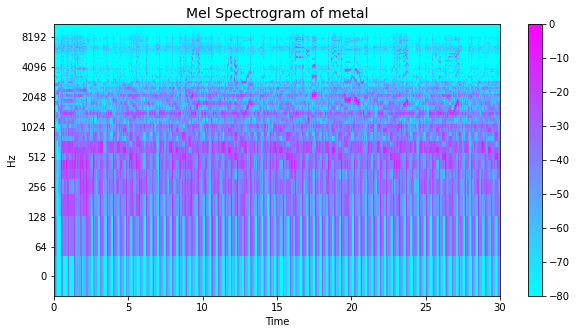

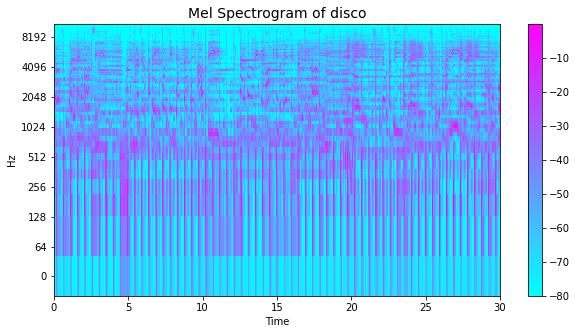

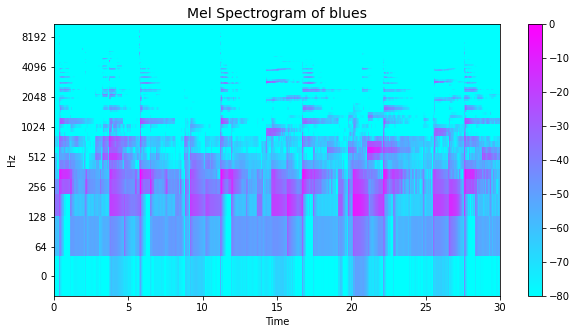

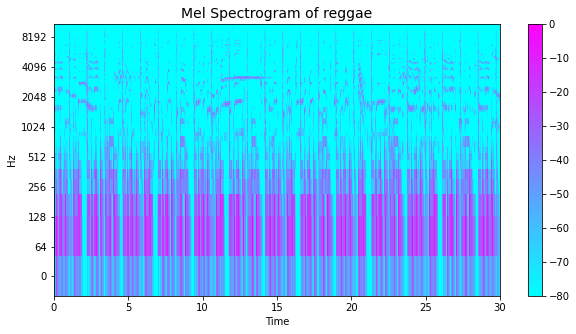

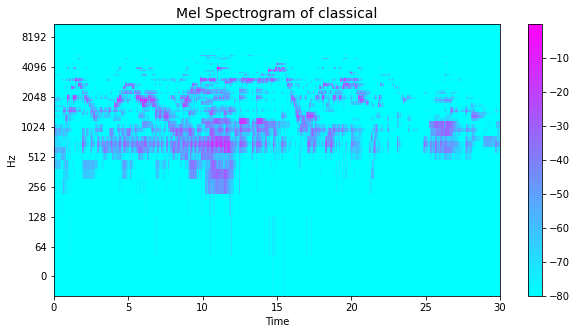

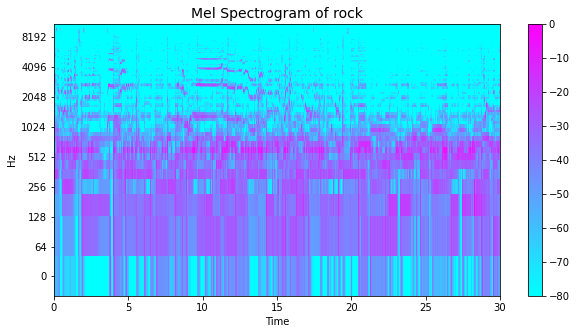

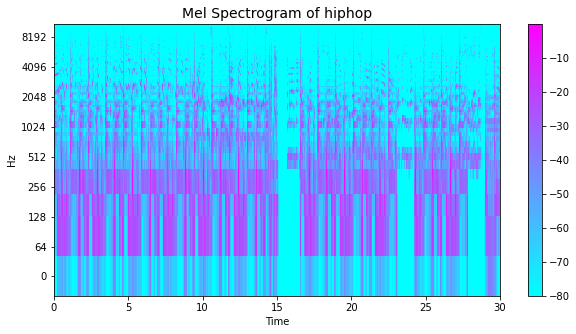

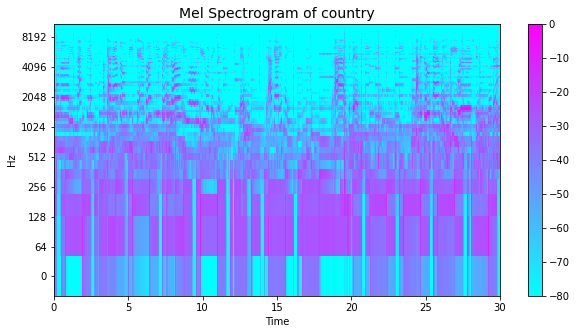

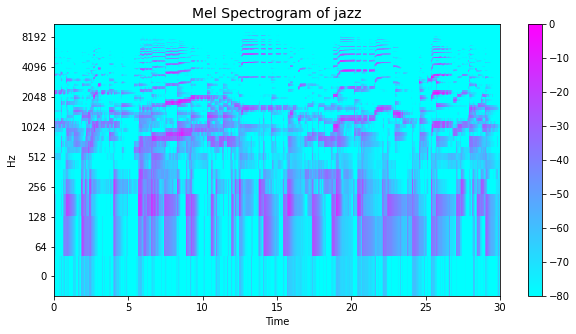

In [7]:
def mel_spectogram(audiofile, title):
    sound, sr = audiofile
    S = librosa.feature.melspectrogram(y=sound, sr=sr)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)
    plt.figure(figsize = (10, 5))
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log',
                             cmap = 'cool');
    plt.colorbar()
    plt.title(f"Mel Spectrogram of {title}", fontsize = 14);
    
def plot_n_mel_spect_for_genre(genre, n):
    audiofiles = files[genre]
    for i, audiofile in enumerate(audiofiles):
        mel_spectogram(audiofile, f"{genre}")
        if i+1 == n:
            break
    
    
for genre in files:
    plot_n_mel_spect_for_genre(genre, 1)

## Harmonics and Perceptrual


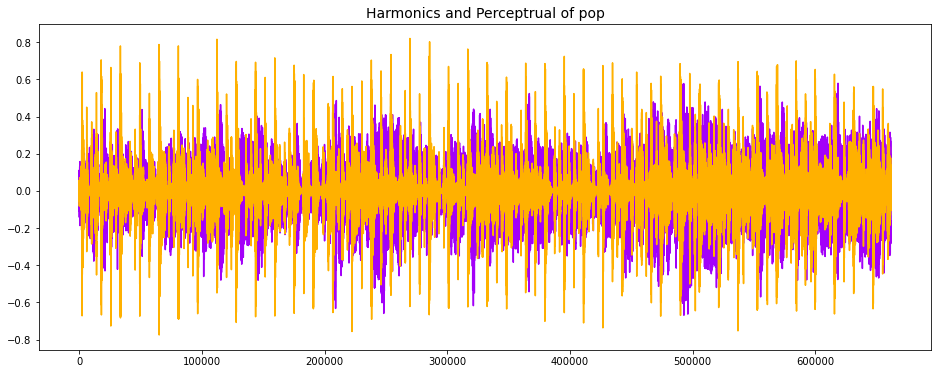

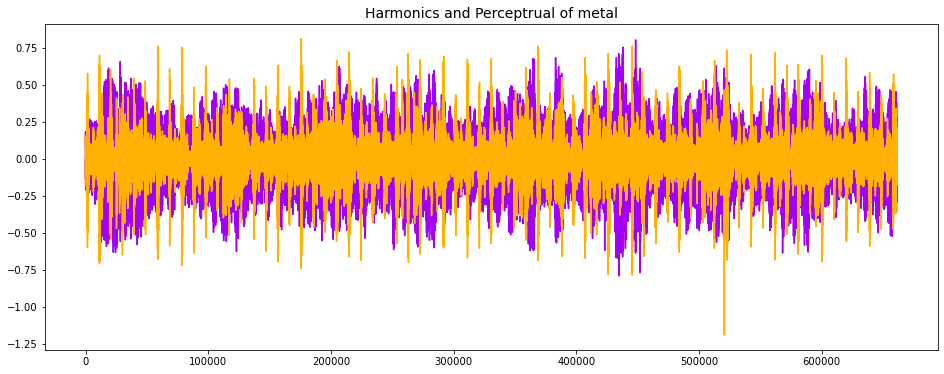

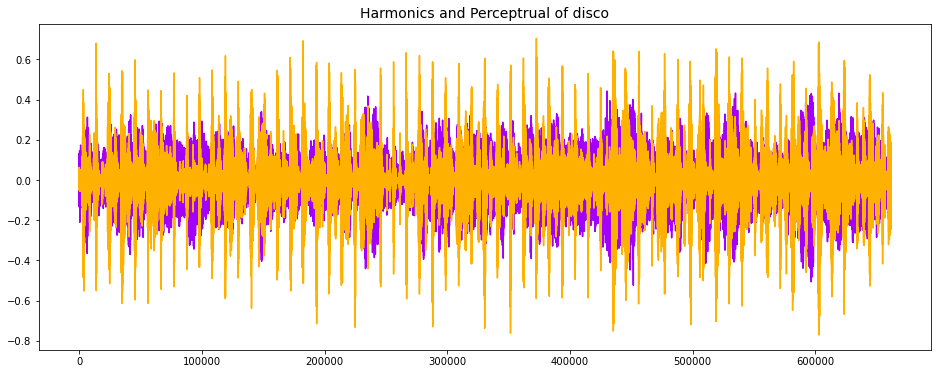

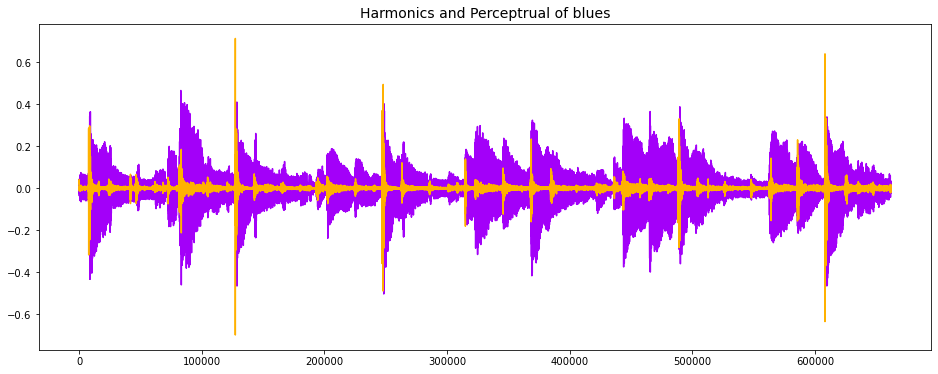

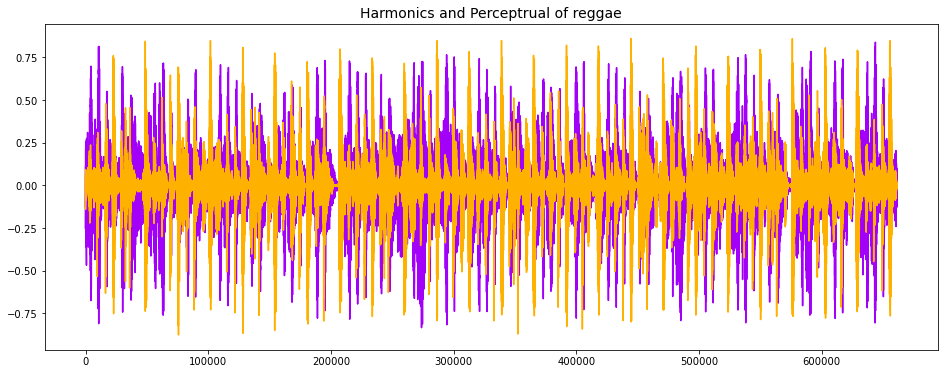

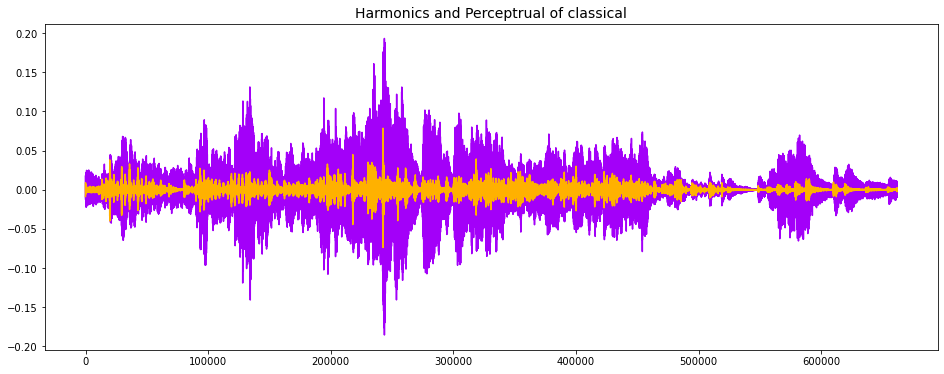

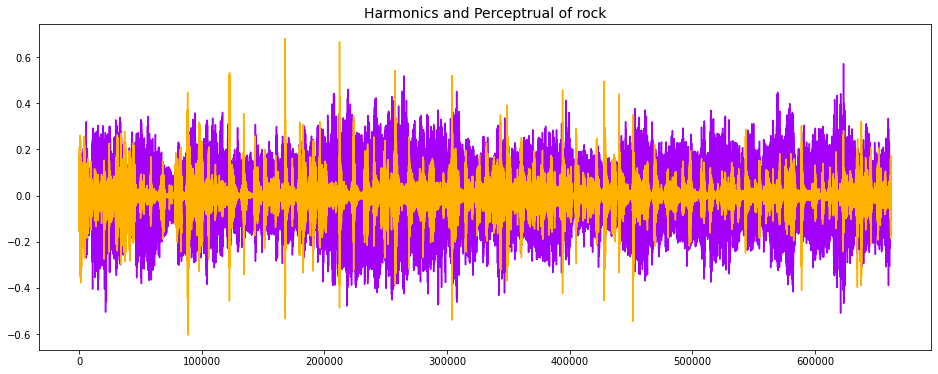

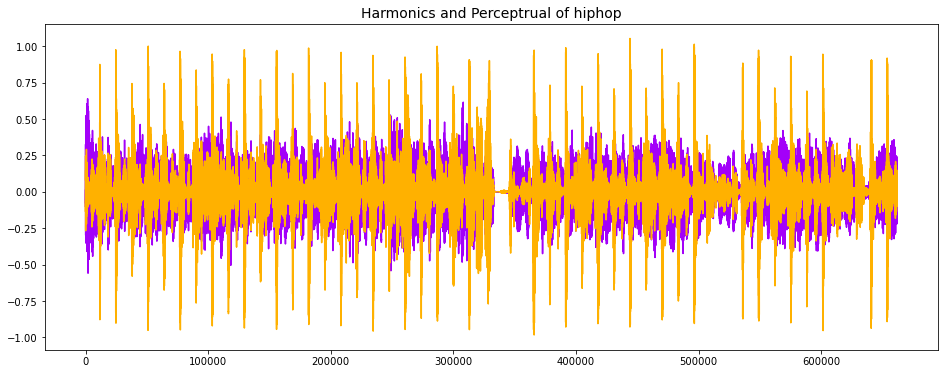

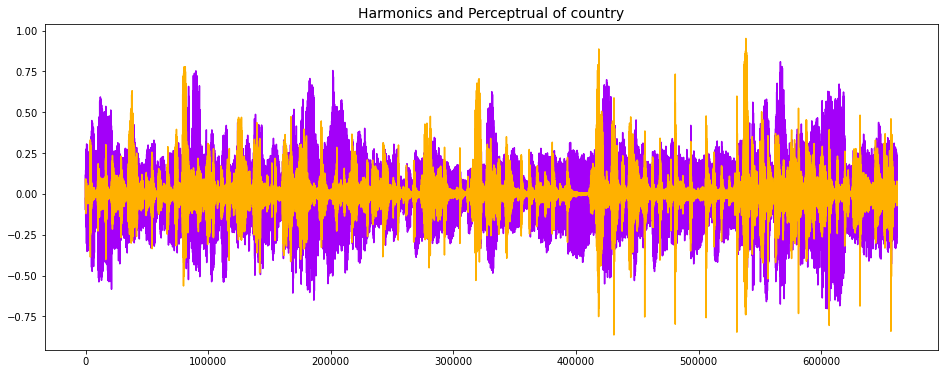

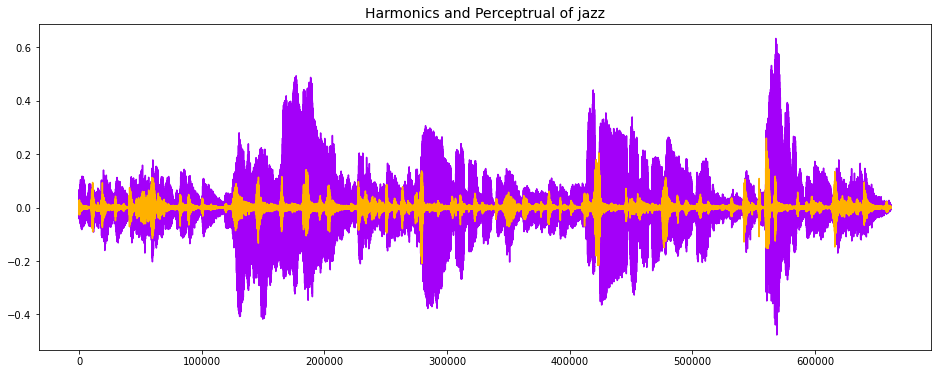

In [8]:
def plot_harm_perc(sound, title):
    y_harm, y_perc = librosa.effects.hpss(sound)
    plt.figure(figsize = (16, 6))
    plt.plot(y_harm, color = '#A300F9')
    plt.plot(y_perc, color = '#FFB100')
    plt.title(f"Harmonics and Perceptrual of {title}", fontsize = 14);
    
def plot_n_harm_perc_for_genre(genre, n):
    audiofiles = files[genre]
    for i, audiofile in enumerate(audiofiles):
        sound, sr = audiofile
        plot_harm_perc(sound, f"{genre}")
        if i+1 == n:
            break
    
for genre in files:
    plot_n_harm_perc_for_genre(genre, 1)

### MFCC

In [33]:
def get_mfcc(sound, sr, title):
    return librosa.feature.mfcc(y=sound, sr=sr, n_mfcc= 10)
    
def plot_n_mfcc_for_genre(genre, n):
    audiofiles = files[genre]
    for i, audiofile in enumerate(audiofiles):
        sound, sr = audiofile
        plot_mfcc(sound, sr, f"{genre}")
        if i+1 == n:
            break
    
for genre in files:
    plot_n_mfcc_for_genre(genre, 1)

[[-218.3363     -200.65347    -199.91217    ...  -22.994867
   -33.352947    -67.08248   ]
 [ 138.97571     135.44237     130.87445    ...   99.71335
   104.21537     104.17291   ]
 [  11.036369      5.927907     -1.4560534  ...   10.804551
     6.718241     -0.5652827 ]
 ...
 [ -25.850101    -31.76654     -28.025005   ...   -4.053445
     5.125146      7.9250593 ]
 [  16.493317      6.4896317    -0.86643755 ...    0.6720142
     6.5708055     9.907269  ]
 [  -5.018361    -10.715616    -20.216846   ...   12.87685
    12.560003      9.234927  ]]
[[-1.11286041e+02 -8.16470032e+01 -5.26295128e+01 ...  1.11334436e-01
  -1.05935745e+01 -5.95094070e+01]
 [ 1.09089264e+02  1.05307648e+02  1.14926407e+02 ...  1.06505539e+02
   9.67136078e+01  8.71835327e+01]
 [-2.61594353e+01 -3.31179123e+01 -3.08720970e+01 ... -1.82625999e+01
  -1.24242020e+01 -6.11063004e+00]
 ...
 [ 1.30006657e+01  2.01999741e+01  2.27581024e+01 ...  1.65081749e+01
   1.91907082e+01  1.26591434e+01]
 [-2.99745216e+01 -2.936

## Features

In [9]:
# import the features csv
# dataset = pd.read_csv("Data/features_30_sec.csv")
dataset = pd.read_csv("Data/features_3_sec.csv")

In [10]:
dataset.head(100)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0   blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1   blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2   blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3   blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4   blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
..                ...     ...               ...              ...       ...   
95  blues.00009.5.wav   66149          0.318541         0.092254  0.022512   
96  blues.00009.6.wav   66149          0.282178         0.095724  0.084020   
97  blues.00009.7.wav   66149          0.316982         0.081761  0.035043   
98  blues.00009.8.wav   66149          0.304123         0.092418  0.062437   
99  blues.00009.9.wav   66149          0.214538         0.087797  0.109100   

     rms_var  spectral_centroid_mean  spectral_centroid_var  \
0   0.003521             1773.065032          167541.630869   
1   0.001450             1816.693777           90525.690866   
2   0.004620             1788.539719          111407.437613   
3   0.002448             1655.289045          111952.284517   
4   0.001701             1630.656199           79667.267654   
..       ...                     ...                    ...   
95  0.000166             1978.766083          268119.902999   
96  0.002480             2114.387612          500952.102508   
97  0.000625             1394.163595           43371.985767   
98  0.002951             1566.884578           54945.592121   
99  0.007123             2041.000158          222826.655461   

    spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0               1972.744388           117335.771563  ...   39.687145   
1               2010.051501            65671.875673  ...   64.748276   
2               2084.565132            75124.921716  ...   67.336563   
3               1960.039988            82913.639269  ...   47.739452   
4               1948.503884            60204.020268  ...   30.336359   
..                      ...                     ...  ...         ...   
95              2294.809235            57405.895998  ...   38.196289   
96              2104.168057            42315.577589  ...   37.171551   
97              1885.148282            49355.208576  ...   22.047863   
98              1844.723368            73842.669791  ...   67.742897   
99              2113.688482            63504.326225  ...   96.879181   

    mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1     -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2     -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3     -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4      0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   
..          ...         ...          ...         ...          ...         ...   
95    -8.809845   26.386440     0.730088   36.425446     1.809030   31.346075   
96    -5.407203   33.206928    -3.435096   56.633667     1.774627  128.641724   
97    -1.388044   19.825150     0.019810   24.153242    -3.318320   37.098282   
98     2.270324   55.772289     0.623105   78.073647    -0.333527   63.566315   
99    -1.562159   87.504631    -4.511061   99.126534     7.108432   85.149986   

    mfcc20_mean  mfcc20_var  label  
0     -0.243027   43.771767  blues  
1      5.784063   59.943081  blues  
2      2.517375   33.105122  blues  
3      3.630866   32.023678  blues  
4      0.536961   29.146694  blues  
..          ...         ...    ...  
95    -0.551058   32.386032  blues  
96    -8.579774   34.291157  blues  
97    -4.615387   18.787031  blues  
98    -0.659919   73.471901  blues  
99    -0.465758  108.709732  blues  

[100 rows x 60 columns]

In [11]:
# List of features
#print('\",\"'.join(dataset.columns))

# filter by interesting features:
'''
features = ["chroma_stft_mean","chroma_stft_var","rms_mean","rms_var","spectral_centroid_mean",
            "spectral_centroid_var","spectral_bandwidth_mean","spectral_bandwidth_var","rolloff_mean",
            "rolloff_var","zero_crossing_rate_mean","zero_crossing_rate_var","harmony_mean","harmony_var",
            "perceptr_mean","perceptr_var","tempo", "label"]
'''

dataset = dataset
dataset.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

## Correlation Matrix

/var/folders/s7/d2gc2l317p15g3y_6zbwmhz80000gp/T/ipykernel_42782/2147561976.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset[cols].corr()


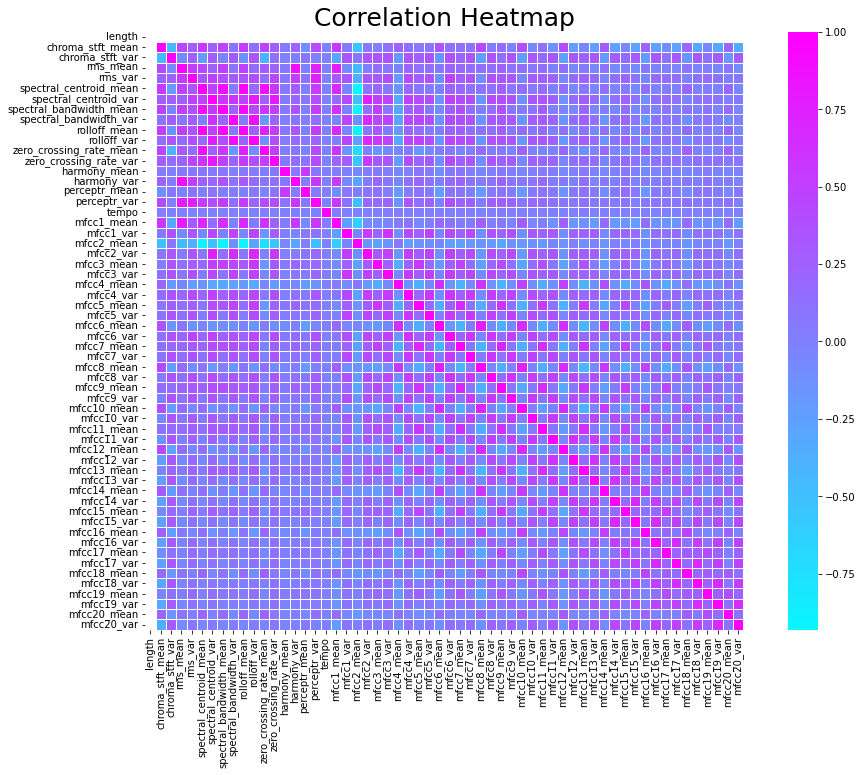

In [12]:

cols = [col for col in dataset.columns]
corr = dataset[cols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 100, as_cmap=True, s = 100, l = 20, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='cool', vmax=1, center=0,
            square=True, linewidths=.5)

plt.title('Correlation Heatmap', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

## PCA

[0.26745621 0.18238003]


Text(0, 0.5, 'Principal Component 2')

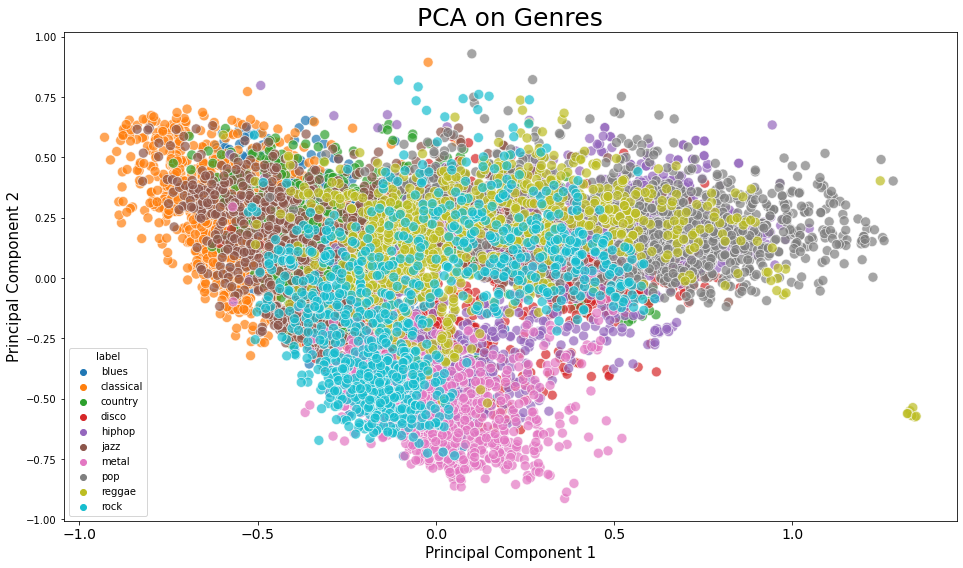

In [13]:
from sklearn import preprocessing

data = dataset.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_)

# plot PCA
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

## Models

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN for baseline

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

### Other models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier()
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
lg = LogisticRegression(random_state=0, multi_class='multinomial')

## Evaluate models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

def label_encode(y):
    le = LabelEncoder()
    return le.fit_transform(y)

def model_eval(model, title):
    is_cross_model = "Cross" in title
    y = y_train if not is_cross_model else label_encode(y_train)
    model.fit(X_train, y)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    _y_test = y_test if not is_cross_model else label_encode(y_test)
    print('Accuracy', title, ':', round(accuracy_score(_y_test, preds), 5), '\n')
    return confusion_matrix(_y_test, preds)

In [18]:
# Gets the index of a label. (label string to label number)
label_names = list(files.keys())

# Precision = TP / (TP + FP)
# TPs are in the diagonal
# FN and FP are relative for a class, example, shirt
# FN is a value that is actually a shirt but we predicted as something else (Row)
# FP is a values that we predicted a shirt but it's actually something else. (Column)

def get_precision_per_class(confusion_matrix):
    precision_per_class = {}
    for i, label in enumerate(label_names):
        tp = confusion_matrix[i][i]
        column = [int(row[i]) for row in confusion_matrix]
        #print(f"Column for class {label}: {column}")
        fps = [n for n in column if n != tp]
        precision = tp / (tp + sum(fps))
        print(f"{round(precision, 4)}")
        precision_per_class[label] = precision
    return precision_per_class

In [19]:
knn_confusion_matrix = model_eval(knn, "KNN")
precision_per_class = get_precision_per_class(knn_confusion_matrix)

Accuracy KNN : 0.80214 

0.85
0.8617
0.6796
0.6494
0.8607
0.8614
0.9068
0.8493
0.7756
0.8054


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
tree_confusion_matrix = model_eval(tree, "Decision Tree")
precision_per_class = get_precision_per_class(tree_confusion_matrix)

Accuracy Decision Tree : 0.64298 

0.6179
0.8703
0.4778
0.5619
0.6467
0.6505
0.75
0.7153
0.6817
0.4652


In [21]:
rf_confusion_matrix = model_eval(rforest, "Random Forest")
precision_per_class = get_precision_per_class(rf_confusion_matrix)

Accuracy Random Forest : 0.81415 

0.8662
0.9046
0.6667
0.746
0.8897
0.7968
0.8265
0.8351
0.8089
0.8136


In [22]:
lg_confusion_matrix = model_eval(lg, "Logistic Regression")
precision_per_class = get_precision_per_class(lg_confusion_matrix)

Accuracy Logistic Regression : 0.6977 

0.6667
0.8645
0.5971
0.6319
0.7179
0.7509
0.7228
0.7062
0.6818
0.5773


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## More complex models

In [23]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [24]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')

In [25]:
svm_confusion_matrix = model_eval(svm, "Support Vector Machine")
precision_per_class = get_precision_per_class(svm_confusion_matrix)

Accuracy Support Vector Machine : 0.75409 

0.7461
0.8724
0.6931
0.6142
0.8
0.7774
0.8084
0.8147
0.7534
0.6331


In [26]:
nn_confusion_matrix = model_eval(nn, "Neural Nets")
precision_per_class = get_precision_per_class(nn_confusion_matrix)

Accuracy Neural Nets : 0.67968 

0.6831
0.8942
0.4624
0.6044
0.6997
0.7063
0.8147
0.7925
0.6544
0.4587


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
xgb_confusion_matrix = model_eval(xgb, "Cross Gradient Booster")
precision_per_class = get_precision_per_class(xgb_confusion_matrix)

Accuracy Cross Gradient Booster : 0.90123 

0.9023
0.9346
0.8185
0.8627
0.9461
0.8912
0.9373
0.9137
0.9161
0.8885


In [28]:
xgbrf_confusion_matrix = model_eval(xgbrf, "Cross Gradient Booster (Random Forest)")
precision_per_class = get_precision_per_class(xgbrf_confusion_matrix)

Accuracy Cross Gradient Booster (Random Forest) : 0.74908 

0.8165
0.8892
0.5089
0.7384
0.7745
0.7033
0.8187
0.7641
0.7978
0.7566
